## Cucker-Smale Model

$$ \frac{d \mathbf{r}_{i}}{dt} = \mathbf{v}_{i}(t)$$
$$ \frac{d \mathbf{v}_{i}}{dt} = \frac{1}{N} \sum^{N}_{j=1}\frac{1}{(1+||\mathbf{r}_{i}-\mathbf{r}_{j}||^{2})^{\beta}}(\mathbf{v}_{j} - \mathbf{v}_{i})$$

- solve for N = 50 and T = 20
- open boundary conditions
- particles should be initialised with random positions and velocities but with the same speed, randomly sample angles

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import copy

### 1a)
Plot initial condition and state at t = 20 for two different values of $\beta$, where one should lead to alignment of velocities and one should not. Comment on choice of $\beta$

In [15]:
N = 50
T = 20
dt = 0.1

#matrix to store postions and velocities
x1 = np.zeros(shape= (N, int(T/dt)))
x2 = np.zeros(shape= (N, int(T/dt)))
v1 = np.zeros(shape= (N, int(T/dt)))
v2 = np.zeros(shape= (N, int(T/dt)))

#generating random initial starting points
x1[:, 0] = np.random.uniform(size = (N))
x2[:, 0] = np.random.uniform(size = (N))

#generating random initial velocities
angles = np.random.uniform(0, 2*np.pi, size = N)
v1[:, 0] = np.array([np.cos(theta) for theta in angles])
v2[:, 0] = np.array([np.sin(theta) for theta in angles])


In [16]:
def Psi(X, V, beta, N):
    P = np.zeros(shape=(N, 2))
    for i in range(0, N):
        for j in range(0, N):
            if i != j:
                diff = np.linalg.norm(X[:, i] - X[:, j])**2
                P[i, :] += (1/(1+diff)**beta)*(V[:, j] - V[:, i])
    return P

def pos_step(x, v, dt):
    return x + v*dt

def vel_step(x1, x2, v1, v2, beta, dt, N):
    P = Psi(np.array([x1, x2]), np.array([v1, v2]), beta, N)
    v1 += (dt*P[:, 0])/N
    v2 += (dt*P[:, 1])/N
    return v1, v2

def cucker_smale(x1, x2, v1, v2, beta, dt, N):
    x1a = copy.deepcopy(x1)
    x2a = copy.deepcopy(x2)
    v1a = copy.deepcopy(v1)
    v2a = copy.deepcopy(v2)
    for i in range(0, len(x1[0, :])-1):
        x1a[:, i+1] = pos_step(x1a[:, i], v1a[:, i], dt)
        x2a[:, i+1] = pos_step(x2a[:, i], v2a[:, i], dt)
        
        v1a[:, i+1], v2a[:, i+1] = vel_step(x1a[:, i], x2a[:,i] , v1a[:, i], v2a[:, i], beta, dt, N)
    return x1a, x2a, v1a, v2a

In [17]:
beta = 0.3


X1, X2, V1, V2 = cucker_smale(x1, x2, v1, v2, beta, dt, N)

<IPython.core.display.Javascript object>


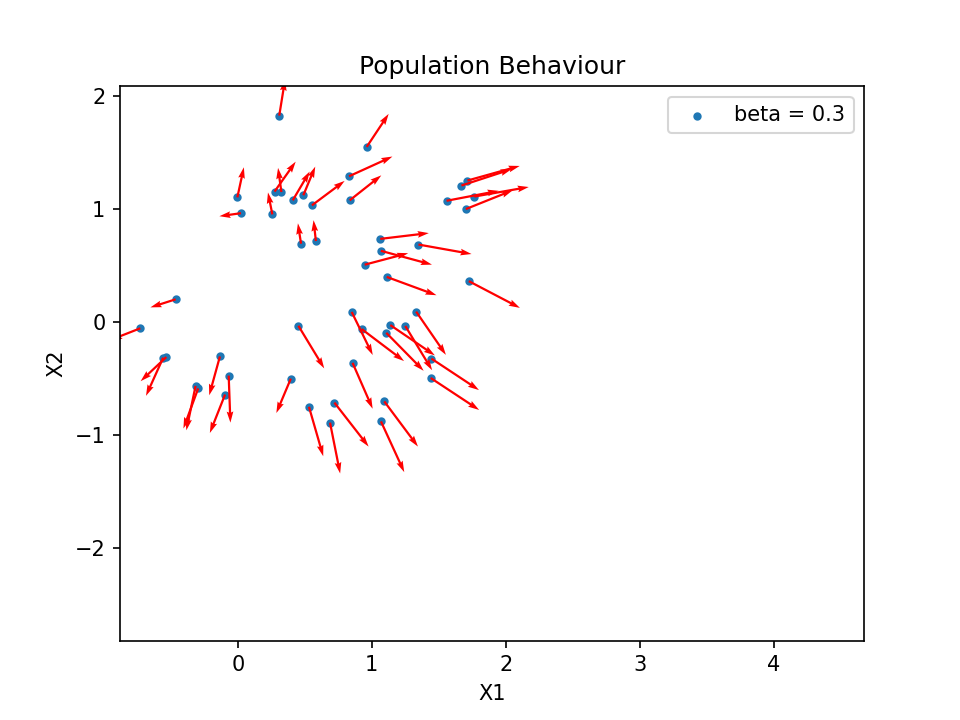

In [18]:

#creating animated plot to show the progress of the of population
%matplotlib notebook

fig, ax = plt.subplots()

def update(frame):
    ax.clear()    
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_title('Population Behaviour')
    line = ax.scatter(X1[:, frame], X2[:, frame], marker='.')
    ax.quiver(X1[:, frame], X2[:, frame], V1[:, frame], V2[:, frame], scale=5, color='red', width=0.003)
    ax.legend([f'beta = {beta}'], loc = 'upper right')
    ax.set_xlim(X1.min(), X1.max())
    ax.set_ylim(X2.min(), X2.max())
    return line


ani = FuncAnimation(fig, update, frames=int(T/dt), blit=True, interval=200, repeat=False)
plt.show()


The above code shows an animation of the evolution of the particles in the system with a value of beta (0.3) that should lead to 'flocking', as time progresses. We can see that although the agents originally start in random locations and with random velocities, they eventually average out their velocities such that they are all moving in the same direction with the same speed.

I shall now plot the initial and final states for a simulation using a beta where the particles align and using one where alignment is not seen, as per the question.

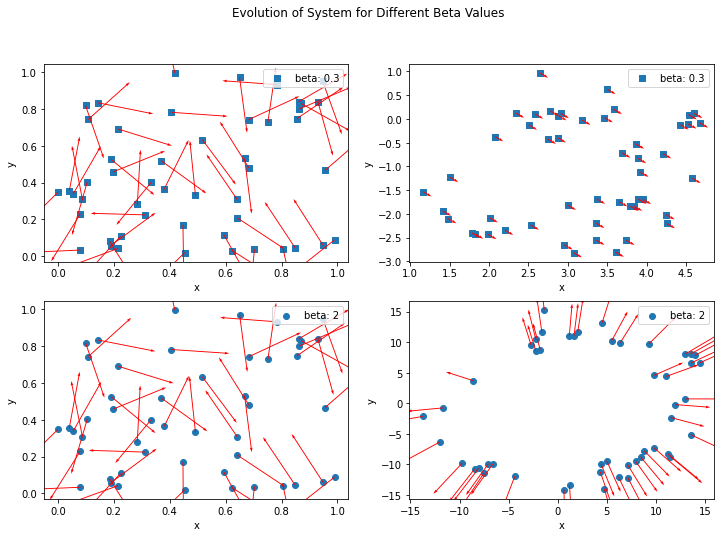

In [19]:
beta_list = [0.3, 2]

%matplotlib inline
fig, axes = plt.subplots(2, 2, figsize = (12, 8))

markers = ['s', 'o']

for i, beta1 in enumerate(beta_list):
    X1a, X2a, V1a, V2a = cucker_smale(x1, x2, v1, v2, beta1, dt, N)
    
    axes[i, 1].scatter(X1a[:, -1], X2a[:, -1], marker = markers[i], label = f'beta: {beta1}')
    axes[i, 0].scatter(X1a[:, 0], X2a[:, 0], marker = markers[i], label = f'beta: {beta1}')
    
    axes[i, 1].legend(loc = 'upper right')
    axes[i, 0].legend(loc = 'upper right')
    
    axes[i, 1].quiver(X1a[:, -1], X2a[:, -1], V1a[:, -1], V2a[:, -1], scale=5, color='red', width=0.003)
    axes[i, 0].quiver(X1a[:, 0], X2a[:, 0], V1a[:, 0], V2a[:, 0], scale=5, color='red', width=0.003)
    
    axes[i, 1].set_xlabel('x')
    axes[i, 1].set_ylabel('y')
    axes[i, 0].set_xlabel('x')
    axes[i, 0].set_ylabel('y')


fig.suptitle('Evolution of System for Different Beta Values')
plt.show()

We can see from the above plots that eventhough the initial conditions are the same the differing values of beta have lead to different final states. Beta at 0.3 has lead to 'flocking' where the velocity of each particle has been averaged and they are aligned. This contrasts with the observations at beta = 2 where each particle has stayed on its own path and continued at almost its initial velocity. This is because the higher value of beta leads to less interactions between the particles whereas for a value of beta less than 0.5 the increased interactions between particles should lead to velocity alignment every iteration, with alignment states of systems with beta greater than 0.5 dependant on initial conditions.

### 1b)
Comment on results, comparing to expected results from lectures. Think about mean velocity: 
$$\bar{\mathbf{v}}(t) = \frac{1}{N} \sum^{N}_{i=1} \mathbf{v}_{i}(t)$$

and order parameter:
$$\psi_{\beta}(t) = \frac{1}{N} \sum^{N}_{i = 1}||\mathbf{V}_{i}(t) - \bar{\mathbf{v}}||^{2}$$

Confirm the average velocity is constant, thus requiring consideration of $\psi$.

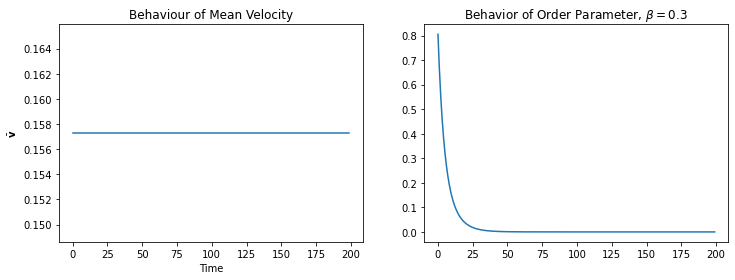

In [20]:
def calculate_phi(N, V1, V2):
    mean_vel = np.array([V1.mean(axis=0), V2.mean(axis=0)])
    n = len(V1[0])
    V = np.array([V1, V2])
    psi_list = []
    for i in range(n):
        x = np.linalg.norm(V[:, :, i]-mean_vel[:, 0].reshape(2, 1), axis = 0)**2
        psi_list.append(x.mean())
    return psi_list


order_params = calculate_phi(N, V1, V2)



v_bar = np.array([V1.mean(axis=0), V2.mean(axis=0)])



fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))

ax1.plot(np.sqrt(v_bar[0].round(3)**2 + v_bar[1].round(3)**2))
ax1.set_xlabel('Time')
ax1.set_ylabel(r'$\bar{\mathbf{v}}$')
ax1.set_title('Behaviour of Mean Velocity')

ax2.plot(order_params)
ax2.set_title(rf'Behavior of Order Parameter, $\beta = {beta}$')
ax2.plot()

plt.show()

The left hand plot above shows that the average velocity of the particales has stayed constant with time as expected. Therefor to investigate alignment of agents, the order parameter is introduced. The lefthand side plot shows how the order parameter for a system with beta = 0.3 (should be alignement) varies, we can see that the system is initially at maximal disorder but the order parameter quickly decreases and plateaus at roughly zero meaning the particles become aligned, as expected.

### 1c)

Solve the same problem numerically for all $\beta \in [0, 2]$, with intervals of 0.1. Define $\psi_{\beta} = \psi_{\beta}(T)$ and plot $(\beta, \psi(\beta))$. Comment on plot and compare with expectations.

$$\psi_{\beta}(T) = \frac{1}{N} \sum^{N}_{i = 1}||\mathbf{V}_{i}(T) - \bar{\mathbf{v}}||^{2}$$

In [21]:
def calculate_phi_T(N, V1, V2):
    mean_vel = np.array([V1.mean(axis=0), V2.mean(axis=0)])
    V = np.array([V1[:, -1], V2[:, -1]])
    return np.mean(np.linalg.norm(V-mean_vel[:, 0].reshape(2, 1), axis = 0)**2)



In [22]:
beta_range = np.arange(0, 2.1, 0.1)

psi_beta = []
for beta in beta_range:
    X1b, X2b, V1b, V2b = cucker_smale(x1, x2, v1, v2, beta, dt, N)
    
    psi_beta.append(calculate_phi_T(N, V1b, V2b))

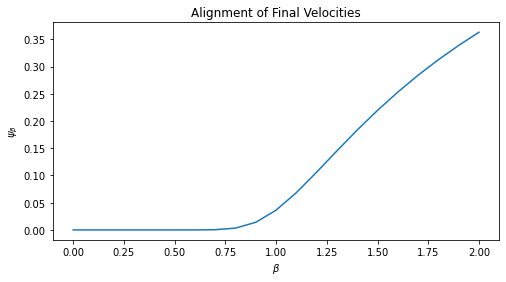

In [23]:
fig, ax1 = plt.subplots(1, 1, figsize = (8, 4))

ax1.plot(beta_range, psi_beta)
ax1.set_xlabel(r'$\beta$')
ax1.set_ylabel(r'$\psi_{\beta}$')
ax1.set_title('Alignment of Final Velocities')

plt.show()

The above plot shows how the order parameter varies with the value of beta. As previously stated, for beta less than 0.5 we should see alignment every time, this is demonstrated in the order parameter being close to zero for the final states of the system as shown in the plot above within this beta range. We can see the value of the order parameter begins to increase at around beta = 0.75 where it then steadily increases at beta increases, thus showing that the grater the value of beta the more disorder (less alignment) seen in the system due to more varied velocities as expected. The value of increase at 0.75 here is different to the expected value of 0.5 but this is because 0.5 is guaranteed and the 0.75 has come from our initial conditions, if different initial conditions were used this is likely to be a slightly different value. 

## 2 Adding Noise

Model is adapted to include noise: 

$$ d \mathbf{r}_{i} = \mathbf{v}_{i}(t) dt$$
$$ d \mathbf{v}_{i} = \frac{1}{N} \sum^{N}_{j=1}\frac{1}{(1+||\mathbf{r}_{i}-\mathbf{r}_{j}||^{2})^{\beta}}(\mathbf{v}_{j} - \mathbf{v}_{i}) dt + \sigma(\mathbf{r}_{1}, ...., \mathbf{r}_{N}, \mathbf{v}_{1},....., \mathbf{v}_{N}) dB_{t}$$

where $B_{t}$ is a Brownian motion and $\sigma$ is a positive function.

### 2a) 

Consider the case when the noise is dependant on position and speed in the same way as the original Cucker-Smale model, i.e. 
$$ \sigma = \frac{\eta}{N} \sum^{N}_{j=1}\frac{1}{(1+||\mathbf{r}_{i}-\mathbf{r}_{j}||^{2})^{\beta}}(\mathbf{v}_{j} - \mathbf{v}_{i})$$

for $\eta$ and constant $>0$. Repeat question 1(d) for $\eta = 0, 0.05,...., 0.5$. Are there any changes in the behaviour and is this expected?

I shall first provide a simulation of the new model with added noise.

In [24]:
beta = 0.3
eta = 0.9
N = 50
T = 20
dt = 0.1


def noise_vel_step(x1, x2, v1, v2, dt, eta, N):
    P = Psi(np.array([x1, x2]), np.array([v1, v2]), beta, N)
    db = np.sqrt(dt)*np.random.normal(0, 1)
    v1 += ((dt+eta*(db/2))/N)*P[:, 0]
    v2 += ((dt+eta*(db/2))/N)*P[:, 1]
    return v1, v2

def cucker_noise1(x1, x2, v1, v2, beta, eta, dt, N):
    x1a = copy.deepcopy(x1)
    x2a = copy.deepcopy(x2)
    v1a = copy.deepcopy(v1)
    v2a = copy.deepcopy(v2)
    for i in range(0, len(x1[0, :])-1):
        x1a[:, i+1] = pos_step(x1a[:, i], v1a[:, i], dt)
        x2a[:, i+1] = pos_step(x2a[:, i], v2a[:, i], dt)
        
        v1a[:, i+1], v2a[:, i+1] = noise_vel_step(x1a[:, i], x2a[:,i], v1a[:, i], v2a[:, i], dt, eta, N)
    return x1a, x2a, v1a, v2a

    

In [25]:
X1_noise1, X2_noise1, V1_noise1, V2_noise1 = cucker_noise1(x1, x2, v1, v2, beta, eta, dt, N)

<IPython.core.display.Javascript object>


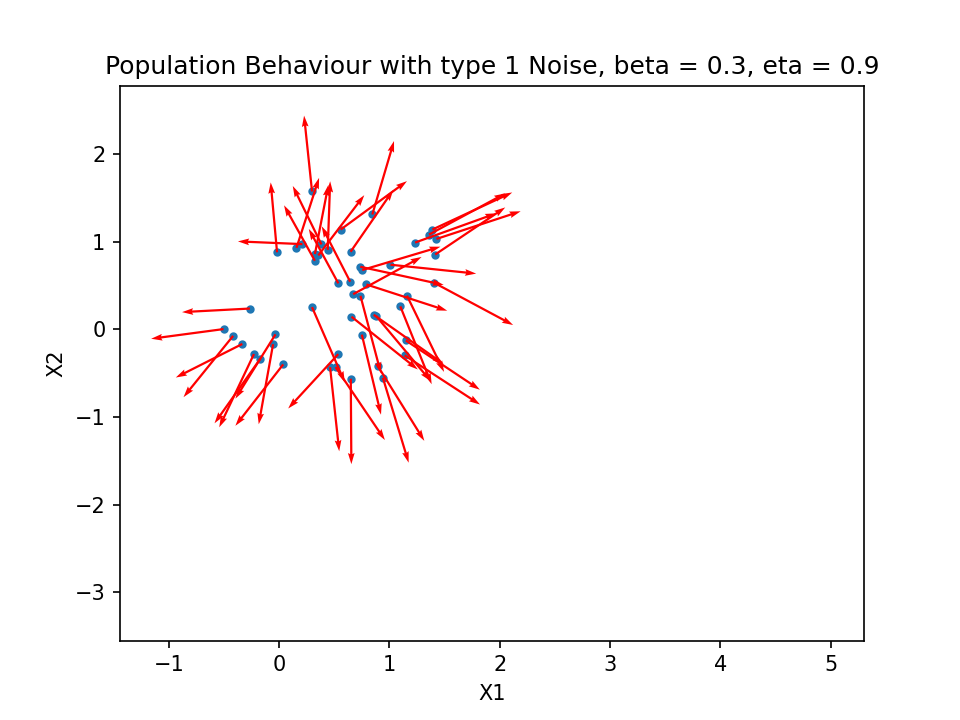

In [26]:
#creating animated plot to show the progress of the population
%matplotlib notebook

fig, ax = plt.subplots()

def update(frame):
    ax.clear()    
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_title(f'Population Behaviour with type 1 Noise, beta = {beta}, eta = {eta}')
    line = ax.scatter(X1_noise1[:, frame], X2_noise1[:, frame], marker='.')
    ax.quiver(X1_noise1[:, frame], X2_noise1[:, frame], V1_noise1[:, frame], V2_noise1[:, frame], scale=5, color='red', width=0.003)
    ax.set_xlim(X1_noise1.min(), X1_noise1.max())
    ax.set_ylim(X2_noise1.min(), X2_noise1.max())

    return line


ani = FuncAnimation(fig, update, frames=int(T/dt), blit=True, interval=200, repeat=False)


plt.show()

The above animation shows how the added noise effects the behaviour of the particles, we can see that for the values of beta and eta above the system still ends in alignment.

I shall now recreate the plot $\psi_{\beta}(T)$ as in 1c). This cell does take a couple of minutes to run.

In [27]:
beta_range = np.arange(0, 2.1, 0.1)
eta_range = np.arange(0, 0.55, 0.05)

psi_beta = np.zeros(shape = (len(eta_range), len(beta_range)))

for i, eta in enumerate(eta_range):
    for j, beta in enumerate(beta_range):
        X1b, X2b, V1b, V2b = cucker_noise1(x1, x2, v1, v2, beta, eta, dt, N)
    
        psi_beta[i][j] = calculate_phi_T(N, V1b, V2b)

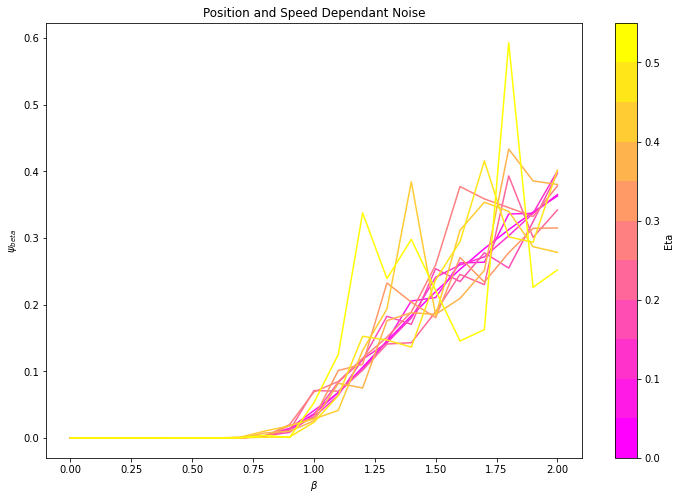

In [28]:
import matplotlib as mpl

cmap = mpl.colormaps['spring'].resampled(len(psi_beta))
norm = mpl.colors.Normalize(vmin = 0, vmax = 0.55)

%matplotlib inline
fig, ax = plt.subplots(1, 1, figsize = (12, 8))

sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, label='Eta')


for i, eta in enumerate(eta_range):
    ax.plot(beta_range, psi_beta[i], color=cmap(norm(eta)))


ax.set_xlabel(r'$\beta$')
ax.set_ylabel(r'$\psi_{beta}$')
ax.set_title('Position and Speed Dependant Noise')
plt.show()

The above plot shows that the noise added in this way does not durastically effect the behaviour seen previously with no noise as the average shape of the graph is the same. Up till 0.75 again there is no displacement from an order parameter of zero but inline with the previous graph the order parameter increases as beta increases further. The only difference is that due to the noise the increase is not as smooth with velocity jumps causing spikes in the plots. These jumps are more apparent for larger values of eta towards 0.5 where it can be seen from the colour gradient that the larger values of eta lead to larger noise and so larger velocity spikes around the same average behaviour.

### 2b)

Repeat 2a) but for the case of
$$\sigma = \frac{\eta}{N}\sum^{N}_{j=1}(\mathbf{v}_{j} - \mathbf{v}_{i})$$
What is observed in this case and is this a reasonable way to add noise to the model?

In [29]:
beta = 2
eta = 0.8
N = 50
T = 20
dt = 0.1

def get_noise(V, N):
    sigma = np.zeros(shape=(N, 2))
    for i in range(0, N):
        for j in range(0, N):
            if i != j:
                sigma[i, :] += (V[:, j] - V[:, i])
    return sigma
    
    
def noise2_vel_step(x1, x2, v1, v2, dt, eta, N):
    
    va1 = copy.deepcopy(v1)
    va2 = copy.deepcopy(v2)
    
    V = np.array([va1, va2])
    P = Psi(np.array([x1, x2]), V, beta, N)
    
    noise = get_noise(V, N)
    
    db = np.sqrt(dt)*np.random.normal(0, 1)
    
    va1 += (1/N)*(P[:, 0]*dt + db*eta*noise[:, 0])
    va2 += (1/N)*(P[:, 1]*dt + db*eta*noise[:, 1])
    return va1, va2


def cucker_noise2(x1, x2, v1, v2, beta, eta, dt, N):
    x1b = copy.deepcopy(x1)
    x2b = copy.deepcopy(x2)
    v1b = copy.deepcopy(v1)
    v2b = copy.deepcopy(v2)
    for i in range(0, len(x1b[0, :])-1):
        x1b[:, i+1] = pos_step(x1b[:, i], v1b[:, i], dt)
        x2b[:, i+1] = pos_step(x2b[:, i], v2b[:, i], dt)
        
        v1b[:, i+1], v2b[:, i+1] = noise2_vel_step(x1b[:, i], x2b[:,i], v1b[:, i], v2b[:, i], dt, eta, N)
    return x1b, x2b, v1b, v2b

In [30]:
X1_noise2, X2_noise2, V1_noise2, V2_noise2 = cucker_noise2(x1, x2, v1, v2, beta, eta, dt, N)

<IPython.core.display.Javascript object>


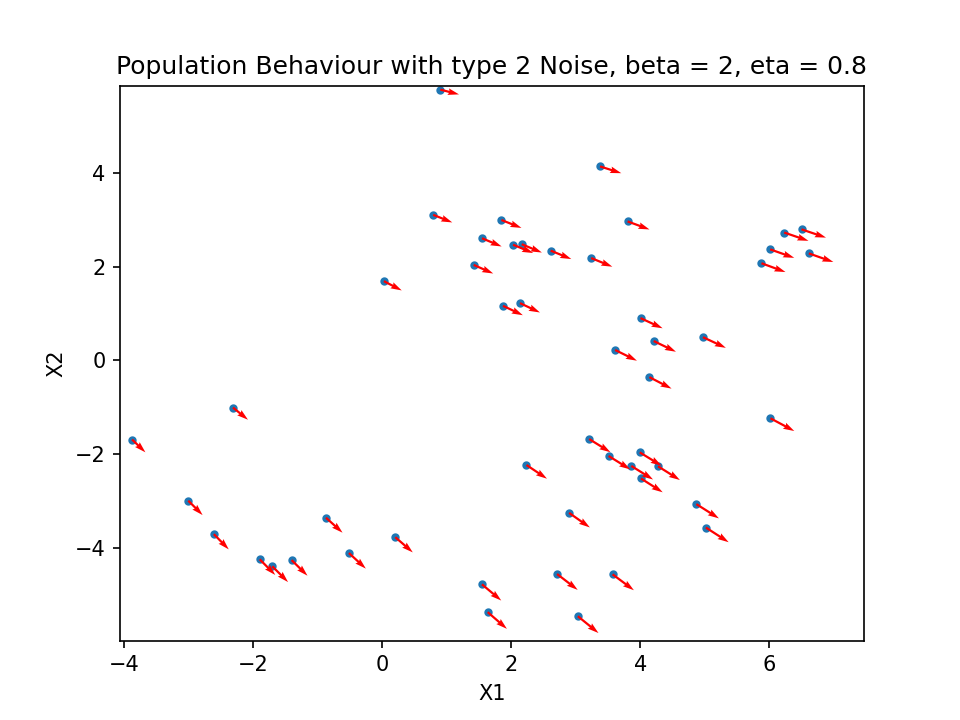

In [31]:
#creating animated plot to show the progress of the population
%matplotlib notebook
fig, ax = plt.subplots()

def update(frame):
    ax.clear()    
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_title(f'Population Behaviour with type 2 Noise, beta = {beta}, eta = {eta}')
    line = ax.scatter(X1_noise2[:, frame], X2_noise2[:, frame], marker='.')
    ax.quiver(X1_noise2[:, frame], X2_noise2[:, frame], V1_noise2[:, frame], V2_noise2[:, frame], scale=5, color='red', width=0.003)
    ax.set_xlim(X1_noise2.min(), X1_noise2.max())
    ax.set_ylim(X2_noise2.min(), X2_noise2.max())
    return line

ani = FuncAnimation(fig, update, frames=int(T/dt), blit=True, interval=200, repeat=False)
plt.show()

The animated plot above shows the behaviour of the system with the added noise. It can be seen that despite the large velocity spikes the systems does still tend towards alignment.

Repeating the same plot of $\psi_{\beta}(T)$ for this new model.

In [32]:
beta_range = np.arange(0, 2.1, 0.1)
eta_range = np.arange(0, 0.55, 0.05)

psi_beta = np.zeros(shape = (len(eta_range), len(beta_range)))

for i, eta in enumerate(eta_range):
    for j, beta in enumerate(beta_range):
        X1c, X2c, V1c, V2c = cucker_noise2(x1, x2, v1, v2, beta, eta, dt, N)
    
        psi_beta[i][j] = calculate_phi_T(N, V1c, V2c)

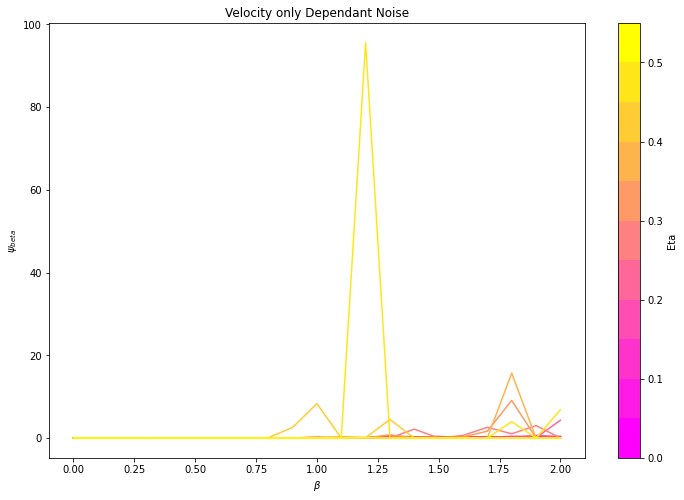

In [33]:
cmap = mpl.colormaps['spring'].resampled(len(psi_beta))
norm = mpl.colors.Normalize(vmin = 0, vmax = 0.55)

%matplotlib inline
fig, ax = plt.subplots(1, 1, figsize = (12, 8))

sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, label='Eta')


for i, eta in enumerate(eta_range):
    ax.plot(beta_range, psi_beta[i], color=cmap(norm(eta)))


ax.set_xlabel(r'$\beta$')
ax.set_ylabel(r'$\psi_{beta}$')
ax.set_title('Velocity only Dependant Noise')
plt.show()

The graph above shows that the noise added in this way has lead to a very different behaviour than previously observed, as beta increases the agents velocities align for all values of eta, with large noise spikes resulting in velocity alignment. Given a greater time this simulation would show alignment for the smaller etas aswell. Therefore this is probably not a wise way to add noise to the system as will probably not reflect true physical systems.

## 3 A new model

The D’Orsogna model is a generalisation of the Cucker-Smale model which also exhibits milling behaviour for some parameter values. It is given by: 
$$\frac{d\mathbf{r}_{i}}{dt} = \mathbf{v}_i(t) $$
$$m \frac{d\mathbf{v}_{i}}{dt} = (\alpha - \beta ||\mathbf{v}_{i}||^{2}) \mathbf{v}_{i} - \nabla U(r_i) $$
$$U(\mathbf{r}_{i}) = \sum_{j \neq i} \left[ C_{r} e^{\frac{-||r_i - r_j||}{l_{r}}} - C_{a} e^{\frac{-||r_i - r_j||}{l_{a}}} \right]$$

Here, m is the mass of each agent, $l_{a}$ and $l_{r}$ are the ranges of repulsion and attraction, with their amplitudes represented by $C_{a}$ and $C_{r}$ respectively.



Consider N = 100 particles and T = 20. Consult original paper to solve this probem with two sets of parameters leading to different behaviours. (one of which should be milling - flying in circles).

To simulate the model we first need to differentiate $U(\mathbf{r}_i)$:
$$\nabla U = \sum_{j \neq i} \frac{\mathbf{r}_j - \mathbf{r}_i}{|\mathbf{r}_i - \mathbf{r}_j|} \left[ \frac{C_r}{l_r} e^{-\frac{|\mathbf{r}_i - \mathbf{r}_j|}{l_r}} - \frac{C_a}{l_a} e^{-\frac{|\mathbf{r}_i - \mathbf{r}_j|}{l_a}} \right]
$$

From the paper we can see that the 'catastrophic' parameter region leading to milling is given by parameters where $c < 1 < l$ where $l = \frac{l_r}{l_a}$ and $C = \frac{C_r}{C_a}$, parameters have been chosen to create the desired effect according to the paper. 

In [34]:
N = 100
T = 20
dt = 0.1

#matrix to store postions and velocities
x1 = np.zeros(shape= (N, int(T/dt)))
x2 = np.zeros(shape= (N, int(T/dt)))
v1 = np.zeros(shape= (N, int(T/dt)))
v2 = np.zeros(shape= (N, int(T/dt)))

#generating random initial starting points
x1[:, 0] = np.random.uniform(size = (N))
x2[:, 0] = np.random.uniform(size = (N))

#generating random initial velocities
angles = np.random.uniform(0, 2*np.pi, size = N)
v1[:, 0] = np.array([np.cos(theta) for theta in angles])
v2[:, 0] = np.array([np.sin(theta) for theta in angles])


milling_parameters = {
    'alpha': 1,
    'beta': 0.5,
    'ca': 1,
    'cr': 0.5,
    'la': 1,
    'lr': 0.5,
    'm': 1
}

clump_parameters = {
    'alpha': 1,
    'beta': 0.5,
    'ca': 1,
    'cr': 0.6,
    'la': 1,
    'lr': 0.5,
    'm': 1
}

def pos_step(x, v, dt):
    return x + v*dt

def grad(r, cr, ca, lr, la, N):
    grad_r = np.zeros_like(r)
    
    for i in range(0, N):
        summation = 0
        for j in range(0, N):
            if i != j:
                norm = np.linalg.norm(r[:, i] - r[:, j])
                summation += ((r[:, j] - r[:, i])/norm)*((cr/lr)*np.exp(-(norm/lr))-(ca/la)*np.exp(-(norm/la)))
            
        grad_r[:, i] = summation
    return grad_r

def D_Orsogna_vel_step(x1, x2, v1, v2, params, dt, N):
    V = np.array([v1, v2])
    X = np.array([x1, x2])
    
    p1 = (params['alpha'] - params['beta']*np.array([np.linalg.norm(V[:, i])**2 for i in range(N)]))*V
    p2 = grad(X, params['cr'], params['ca'], params['lr'], params['la'], N)
    v1 += ((p1[0, :] - p2[0, :])*dt)/params['m']
    v2 += ((p1[1, :] - p2[1, :])*dt)/params['m']
    return v1, v2

def D_Orsogna(x1, x2, v1, v2, params, dt, N):
    x1c = copy.deepcopy(x1)
    x2c = copy.deepcopy(x2)
    v1c = copy.deepcopy(v1)
    v2c = copy.deepcopy(v2)
    for i in range(0, len(x1c[0, :])-1):
        x1c[:, i+1] = pos_step(x1c[:, i], v1c[:, i], dt)
        x2c[:, i+1] = pos_step(x2c[:, i], v2c[:, i], dt)
        
        v1c[:, i+1], v2c[:, i+1] = D_Orsogna_vel_step(x1c[:, i], x2c[:,i], v1c[:, i], v2c[:, i], params, dt, N)
    return x1c, x2c, v1c, v2c
    

In [35]:
X1_milling, X2_milling, V1_milling, V2_milling = D_Orsogna(x1, x2, v1, v2, milling_parameters, dt, N)

X1_clumps, X2_clumps, V1_clumps, V2_clumps = D_Orsogna(x1, x2, v1, v2, clump_parameters, dt, N)

<IPython.core.display.Javascript object>


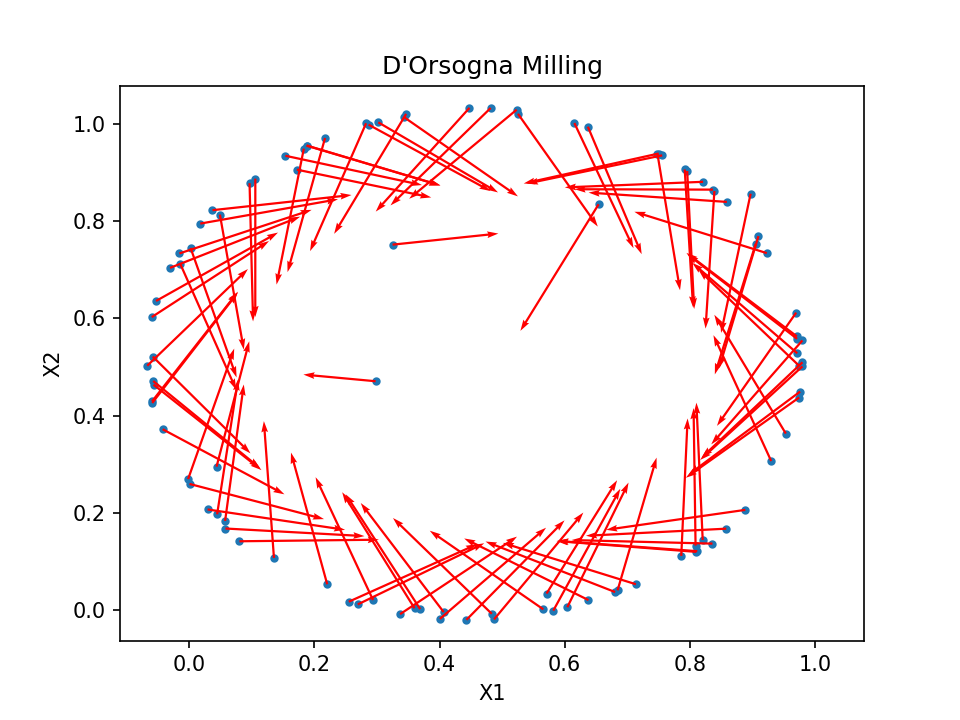

In [36]:
#creating animated plot to show the progress of the population
%matplotlib notebook
fig, ax = plt.subplots()

def update(frame):
    ax.clear()    
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_title("D'Orsogna Milling")
    line = ax.scatter(X1_milling[:, frame], X2_milling[:, frame], marker='.')
    ax.quiver(X1_milling[:, frame], X2_milling[:, frame], V1_milling[:, frame], V2_milling[:, frame], scale=15, color='red', width=0.003)
    ax.set_xlim(X1_milling.min(), X1_milling.max())
    ax.set_ylim(X2_milling.min(), X2_milling.max())
    return line

ani = FuncAnimation(fig, update, frames=int(T/dt), blit=True, interval=200, repeat=False)
plt.show()

The above animation shows how the behaviour of the agents with the milling parameters, we can see how the agents form into a oval pattern and follow eachother around in the loop.

I shall now show the first and final frame for this milling behaviour as well as for the clumping behaviour also seen in the paper.

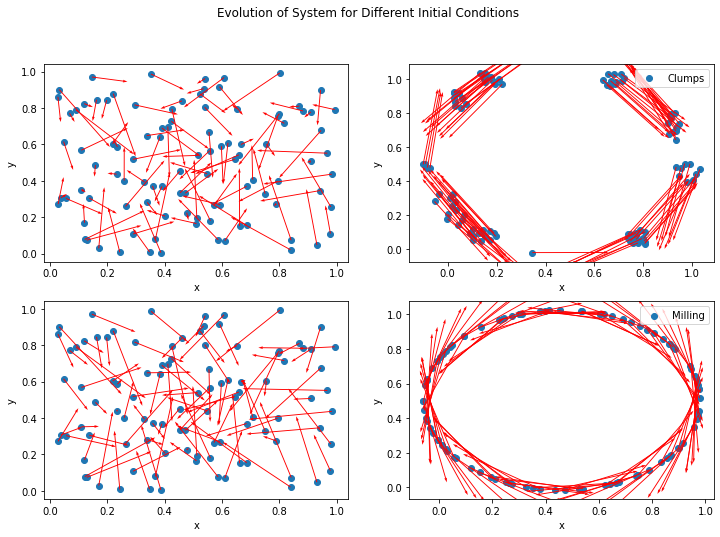

In [37]:
%matplotlib inline
fig, axes = plt.subplots(2, 2, figsize = (12, 8))

labels = ['Clumping']

    
axes[1, 1].scatter(X1_milling[:, -1], X2_milling[:, -1], label = 'Milling')
axes[1, 0].scatter(X1_milling[:, 0], X2_milling[:, 0])

axes[1, 1].quiver(X1_milling[:, -1], X2_milling[:, -1], V1_milling[:, -1], V2_milling[:, -1], scale=10, color='red', width=0.003)
axes[1, 0].quiver(X1_milling[:, 0], X2_milling[:, 0], V1_milling[:, 0], V2_milling[:, 0], scale=10, color='red', width=0.003)  

axes[1, 1].legend(loc = 'upper right')
    
    
axes[0, 1].scatter(X1_clumps[:, -1], X2_clumps[:, -1], label = 'Clumps')
axes[0, 0].scatter(X1_clumps[:, 0], X2_clumps[:, 0])

axes[0, 1].quiver(X1_clumps[:, -1], X2_clumps[:, -1], V1_clumps[:, -1], V2_clumps[:, -1], scale=10, color='red', width=0.003)
axes[0, 0].quiver(X1_clumps[:, 0], X2_clumps[:, 0], V1_clumps[:, 0], V2_clumps[:, 0], scale=10, color='red', width=0.003)  

axes[0, 1].legend(loc = 'upper right')


axes[1, 1].set_xlabel('x')
axes[1, 1].set_ylabel('y')
axes[0, 0].set_xlabel('x')
axes[0, 0].set_ylabel('y')
axes[1, 0].set_xlabel('x')
axes[1, 0].set_ylabel('y')
axes[0, 1].set_xlabel('x')
axes[0, 1].set_ylabel('y')

fig.suptitle('Evolution of System for Different Initial Conditions')
plt.show()

The above plots show that for the same initial conditions and only marginally different initial conditions, there is a great change in the behaviour of the system. The top plots show the clumping behaviour as seen in the paper, where the agents have split into a number of distinct groups that move around together, whereas the bottom shows the end state of the milling behaviour, previously animated, where the agents fly around in a loop.